In [1]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import plotly.graph_objects as go
from sklearn.metrics import adjusted_rand_score
from collections import OrderedDict

## Arquivos

In [2]:
path = "C://Users//vinic//Documents//Arduino//ler_monitor_serial_python_emg//teste_extensor//Features Datasets//"

In [3]:
arquivos_emg = {
    # 5s – abre/fecha mão
    "emg_modulo_abre_fecha_mao_5s_1.csvFeatures.csv": "Clusters_GMM",
    "emg_modulo_abre_fecha_mao_5s_2.csvFeatures.csv": "Clusters_GMM",
    "emg_modulo_abre_fecha_mao_5s_3.csvFeatures.csv": "Clusters_GMM",
    "emg_modulo_abre_fecha_mao_5s_4.csvFeatures.csv": "Clusters_GMM",
    "emg_modulo_abre_fecha_mao_5s_5.csvFeatures.csv": "Clusters_GMM",

    # 10s – abre/fecha mão
    "emg_modulo_abre_fecha_mao_10s_1.csvFeatures.csv": "Clusters_GMM",
    "emg_modulo_abre_fecha_mao_10s_2.csvFeatures.csv": "Clusters_GMM",
    "emg_modulo_abre_fecha_mao_10s_3.csvFeatures.csv": "Clusters_GMM",
    "emg_modulo_abre_fecha_mao_10s_4.csvFeatures.csv": "Clusters_GMM",
    "emg_modulo_abre_fecha_mao_10s_5.csvFeatures.csv": "Clusters_Kmeans",

    # 5s – mão fechada / dedos
    "emg_modulo_dedos_mao_fechada_dedos_5s_1.csvFeatures.csv": "Clusters_GMM",
    "emg_modulo_dedos_mao_fechada_dedos_5s_2.csvFeatures.csv": "Clusters_GMM",
    "emg_modulo_dedos_mao_fechada_dedos_5s_3.csvFeatures.csv": "Clusters_GMM",
    "emg_modulo_dedos_mao_fechada_dedos_5s_4.csvFeatures.csv": "Clusters_GMM",
    "emg_modulo_dedos_mao_fechada_dedos_5s_5.csvFeatures.csv": "Clusters_GMM",

    # Extensor – label direto
    "emg_modulo_mao_aberta_1.csvFeatures.csv": "Label",
    "emg_modulo_mao_aberta_2.csvFeatures.csv": "Label",
    "emg_modulo_mao_aberta_3.csvFeatures.csv": "Label",
    "emg_modulo_mao_aberta_4.csvFeatures.csv": "Label",
    "emg_modulo_mao_aberta_5.csvFeatures.csv": "Label",

    "emg_modulo_mao_fechada_1.csvFeatures.csv": "Label",
    "emg_modulo_mao_fechada_2.csvFeatures.csv": "Label",
    "emg_modulo_mao_fechada_3.csvFeatures.csv": "Label",
    "emg_modulo_mao_fechada_4.csvFeatures.csv": "Label",
    "emg_modulo_mao_fechada_5.csvFeatures.csv": "Label",
}


In [4]:

tipo_cluster = list(OrderedDict.fromkeys(arquivos_emg.values()))


df_features_geral = pd.DataFrame()

for arquivo in list(arquivos_emg.keys()):
  df_emg_features = pd.read_csv(path+arquivo)
  colunas = list(df_emg_features.columns)
  cluster = arquivos_emg[arquivo]
  copy_tipo_cluster = tipo_cluster[:]
  copy_tipo_cluster.pop(copy_tipo_cluster.index(cluster))
  for c in copy_tipo_cluster:
    if c in colunas:
      colunas.pop(colunas.index(c))
    else:
      pass
  df_emg_features = df_emg_features[colunas]
  print(f"{arquivo} -> {cluster}")
  df_emg_features.rename(columns={cluster:"Contração"}, inplace=True)
  df_features_geral = pd.concat([df_emg_features,df_features_geral],axis=0,ignore_index=True)



emg_modulo_abre_fecha_mao_5s_1.csvFeatures.csv -> Clusters_GMM
emg_modulo_abre_fecha_mao_5s_2.csvFeatures.csv -> Clusters_GMM
emg_modulo_abre_fecha_mao_5s_3.csvFeatures.csv -> Clusters_GMM
emg_modulo_abre_fecha_mao_5s_4.csvFeatures.csv -> Clusters_GMM
emg_modulo_abre_fecha_mao_5s_5.csvFeatures.csv -> Clusters_GMM
emg_modulo_abre_fecha_mao_10s_1.csvFeatures.csv -> Clusters_GMM
emg_modulo_abre_fecha_mao_10s_2.csvFeatures.csv -> Clusters_GMM
emg_modulo_abre_fecha_mao_10s_3.csvFeatures.csv -> Clusters_GMM
emg_modulo_abre_fecha_mao_10s_4.csvFeatures.csv -> Clusters_GMM
emg_modulo_abre_fecha_mao_10s_5.csvFeatures.csv -> Clusters_Kmeans
emg_modulo_dedos_mao_fechada_dedos_5s_1.csvFeatures.csv -> Clusters_GMM
emg_modulo_dedos_mao_fechada_dedos_5s_2.csvFeatures.csv -> Clusters_GMM
emg_modulo_dedos_mao_fechada_dedos_5s_3.csvFeatures.csv -> Clusters_GMM
emg_modulo_dedos_mao_fechada_dedos_5s_4.csvFeatures.csv -> Clusters_GMM
emg_modulo_dedos_mao_fechada_dedos_5s_5.csvFeatures.csv -> Clusters_GMM
em

In [5]:
df_features_geral.head(5)

,amp_en,rms,zcr,Band Energy Ratio,Spectral Centroid,Bandwidth,f0,Mag_norm_f0,bp_50_150,bp_150_200,...,mdf,mnf,mav,wl,mean_v,std_v,var_v,ssc,mavs,Contração
0,-35.141150,7.054783,0.173509,0.306352,200.911155,132.088452,104.83733,4.717384,0.022608,0.493515,...,104.83733,132.115953,4.853340,3053.610222,0.000009,7.054783,49.769965,348.0,4.862929,0.0
1,-26.624849,7.211517,0.169599,0.307218,203.736792,132.683659,104.83733,4.661395,0.029736,0.405852,...,104.83733,137.865478,4.939193,3190.029593,-0.000010,7.211517,52.005978,350.0,4.954033,0.0
2,-33.432073,7.317474,0.175464,0.305390,209.144137,131.480420,104.83733,4.461233,0.023889,0.390299,...,104.83733,139.139066,4.908711,3213.709192,-0.000015,7.317474,53.545432,342.0,4.890833,0.0
3,-28.490779,6.974023,0.175464,0.329967,207.509997,129.894769,104.83733,4.638012,0.017712,0.429846,...,104.83733,136.951621,4.751269,3102.303348,-0.000017,6.974023,48.636995,334.0,4.731741,0.0
4,-30.648073,6.892114,0.183284,0.307723,203.495208,128.925202,104.83733,4.178857,0.019050,0.404382,...,104.83733,142.219918,4.627279,3159.797132,-0.000006,6.892114,47.501229,335.0,4.618419,0.0


In [6]:
df_features_geral

,amp_en,rms,zcr,Band Energy Ratio,Spectral Centroid,Bandwidth,f0,Mag_norm_f0,bp_50_150,bp_150_200,...,mdf,mnf,mav,wl,mean_v,std_v,var_v,ssc,mavs,Contração
0,-35.141150,7.054783,0.173509,0.306352,200.911155,132.088452,104.837330,4.717384,0.022608,0.493515,...,104.837330,132.115953,4.853340,3053.610222,0.000009,7.054783,49.769965,348.0,4.862929,0.0
1,-26.624849,7.211517,0.169599,0.307218,203.736792,132.683659,104.837330,4.661395,0.029736,0.405852,...,104.837330,137.865478,4.939193,3190.029593,-0.000010,7.211517,52.005978,350.0,4.954033,0.0
2,-33.432073,7.317474,0.175464,0.305390,209.144137,131.480420,104.837330,4.461233,0.023889,0.390299,...,104.837330,139.139066,4.908711,3213.709192,-0.000015,7.317474,53.545432,342.0,4.890833,0.0
3,-28.490779,6.974023,0.175464,0.329967,207.509997,129.894769,104.837330,4.638012,0.017712,0.429846,...,104.837330,136.951621,4.751269,3102.303348,-0.000017,6.974023,48.636995,334.0,4.731741,0.0
4,-30.648073,6.892114,0.183284,0.307723,203.495208,128.925202,104.837330,4.178857,0.019050,0.404382,...,104.837330,142.219918,4.627279,3159.797132,-0.000006,6.892114,47.501229,335.0,4.618419,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9288,-162.809883,29.660731,0.242913,0.289721,221.637064,137.785813,27.562029,1.633893,0.229239,0.094784,...,153.767111,157.876217,18.037797,13893.094334,0.000087,29.660731,879.758937,423.0,18.066726,1.0
9289,152.464395,27.523666,0.239980,0.324628,211.744655,133.365967,60.926591,1.635672,0.151256,0.099860,...,175.526607,175.479778,17.051236,14001.341625,0.000653,27.523666,757.552216,415.0,16.827126,1.0
9290,-157.090146,25.749068,0.251711,0.438428,202.191276,129.936511,60.926591,1.285425,0.116189,0.101426,...,184.230406,190.473575,15.801446,13650.633789,-0.000087,25.749068,663.014522,414.0,15.718113,1.0
9291,-114.595849,24.284898,0.263441,0.359289,216.343071,132.971004,66.729123,0.963786,0.110285,0.105030,...,179.878507,191.894322,14.827490,13191.730219,-0.000248,24.284898,589.756275,408.0,14.652842,1.0


## Ler Dados

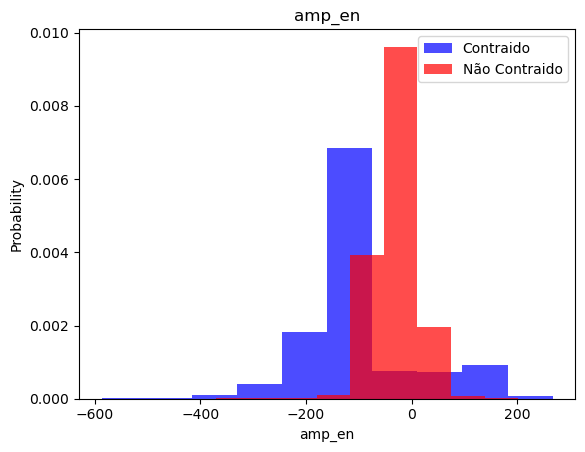

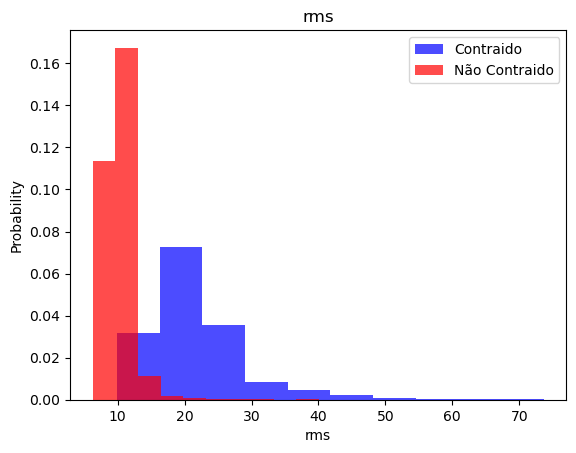

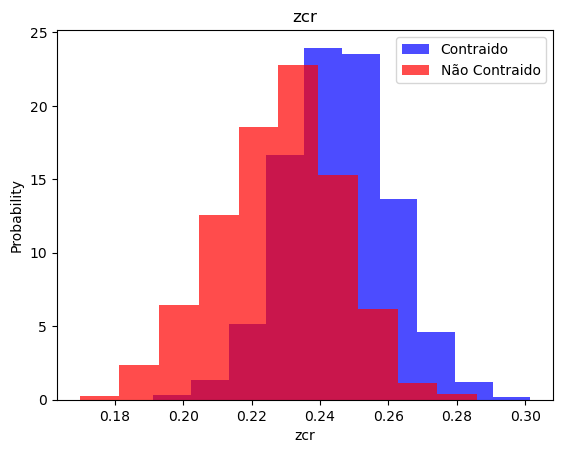

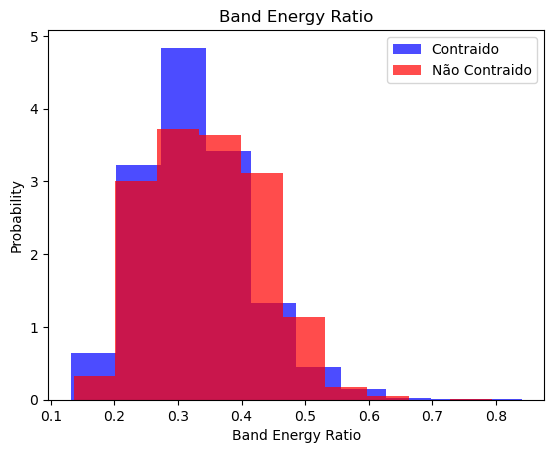

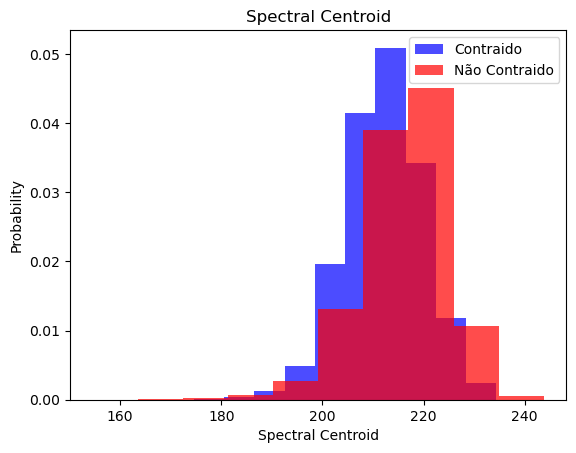

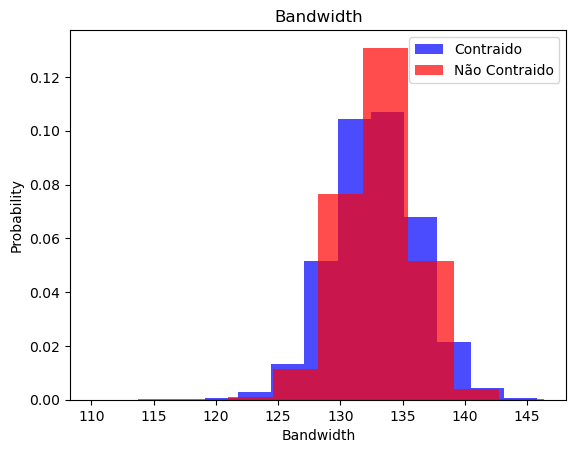

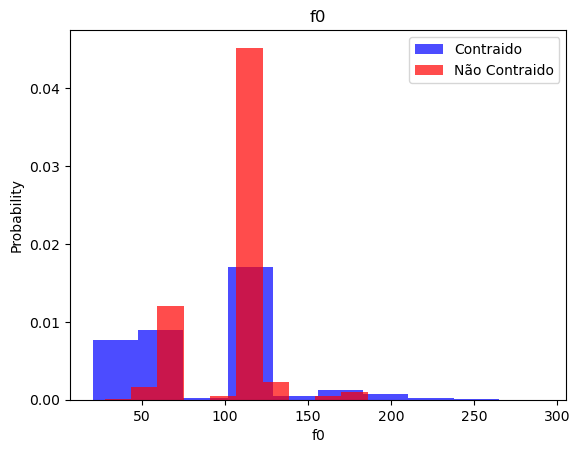

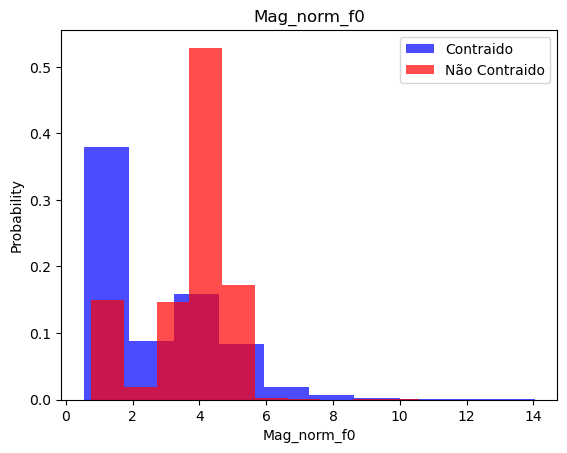

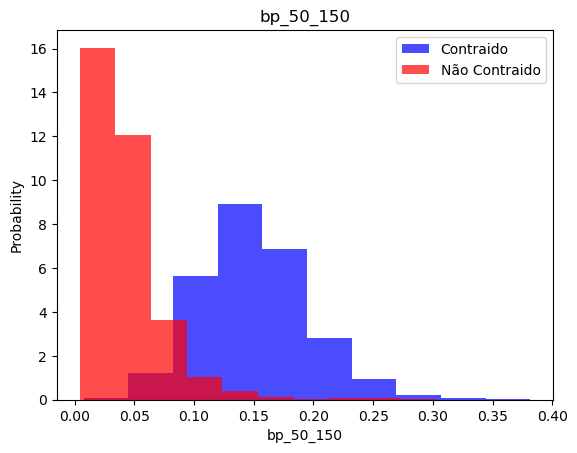

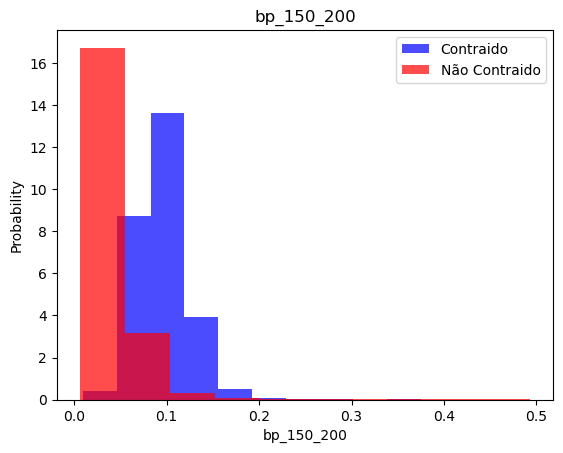

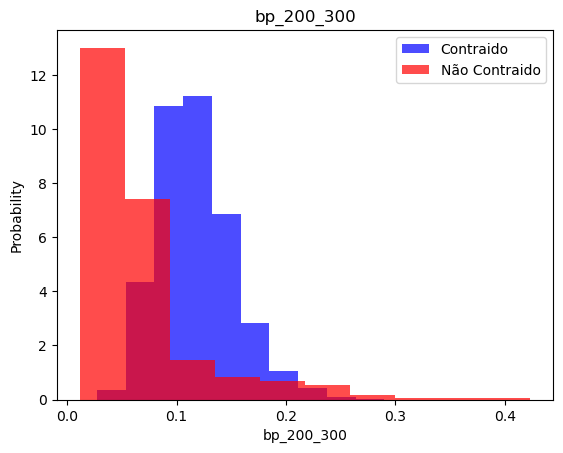

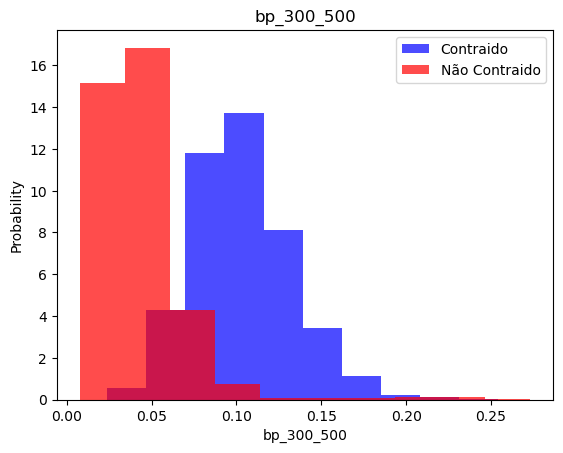

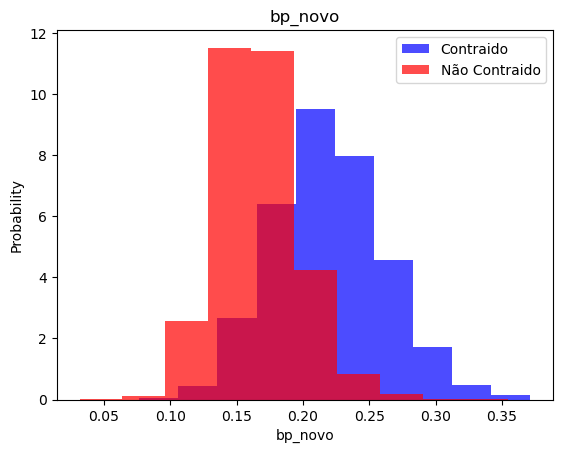

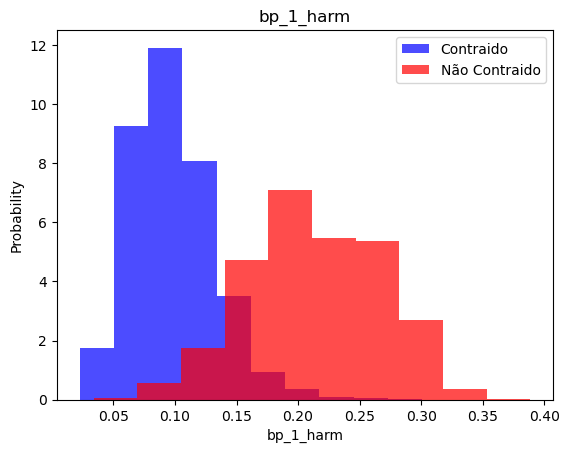

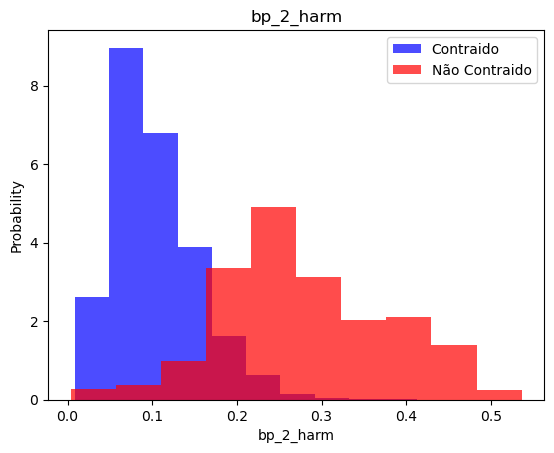

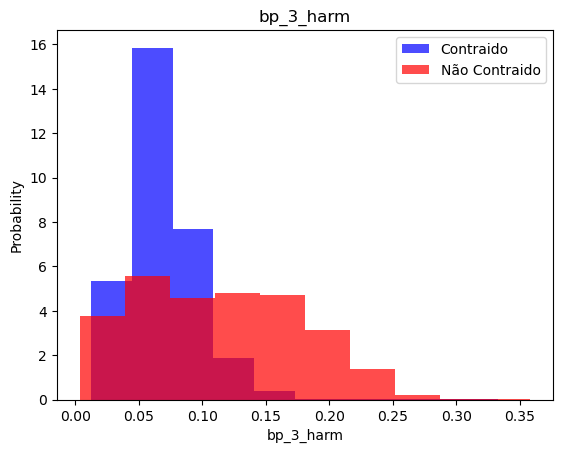

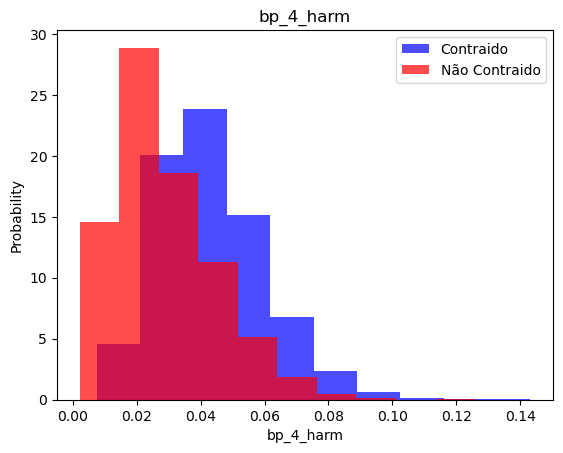

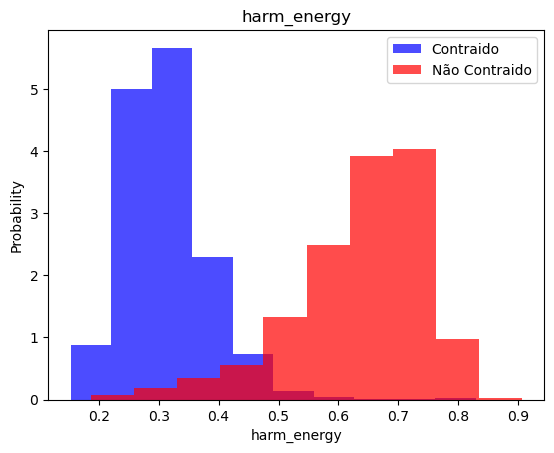

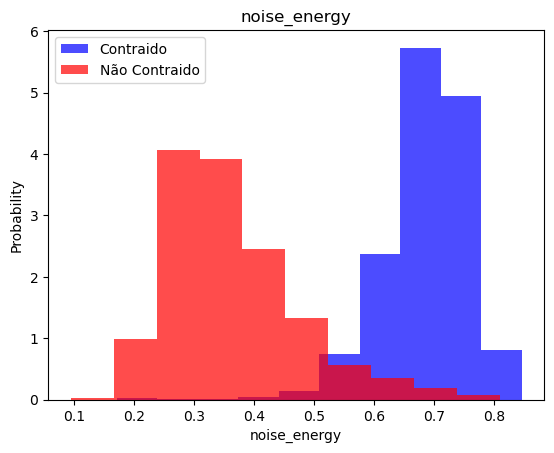

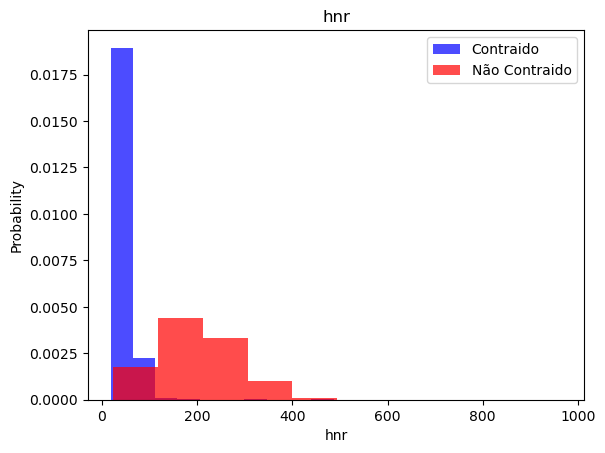

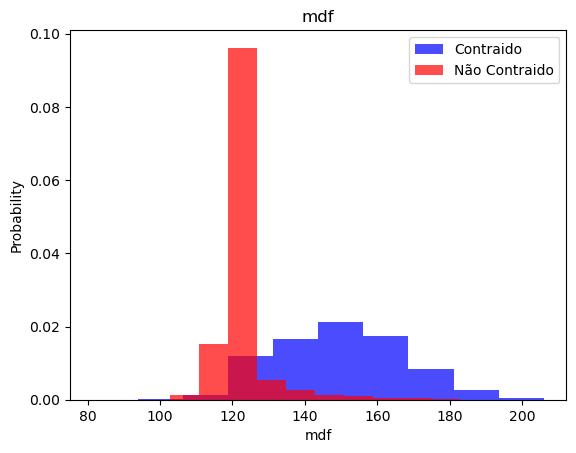

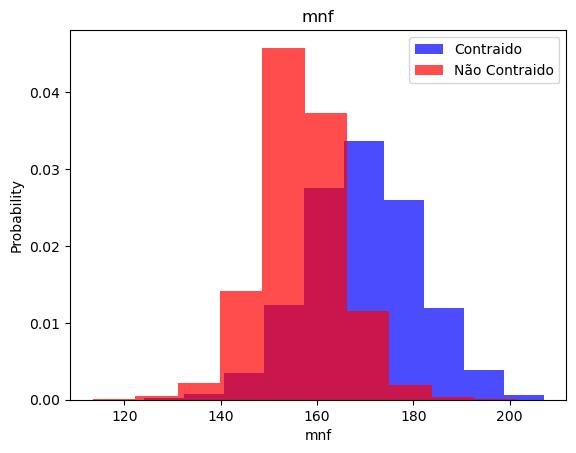

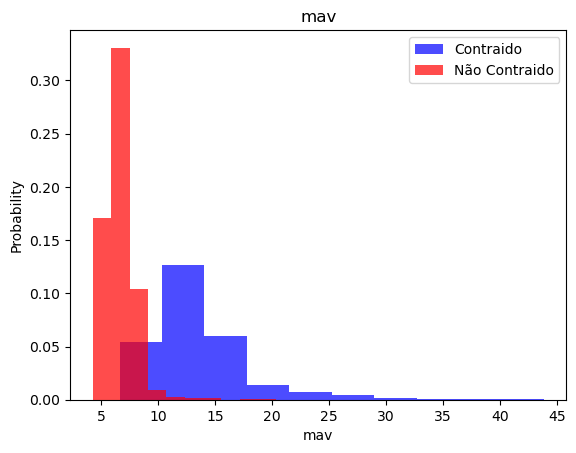

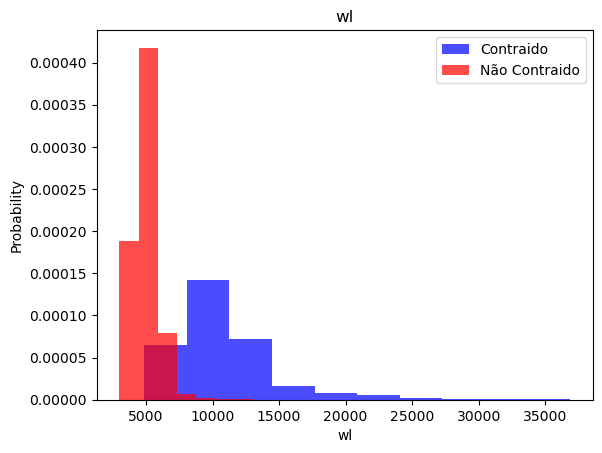

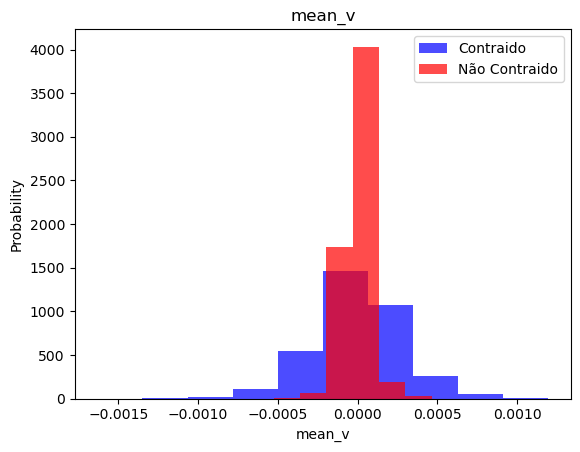

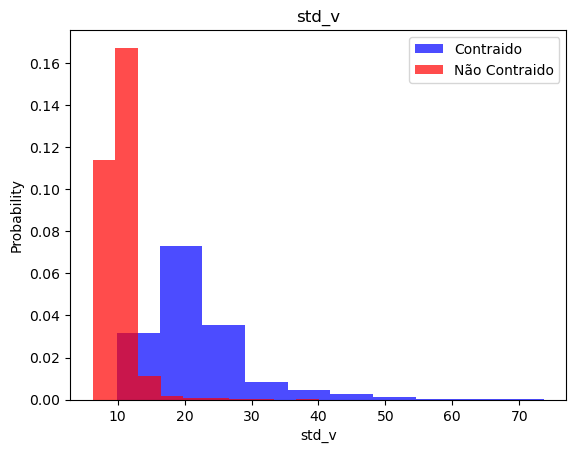

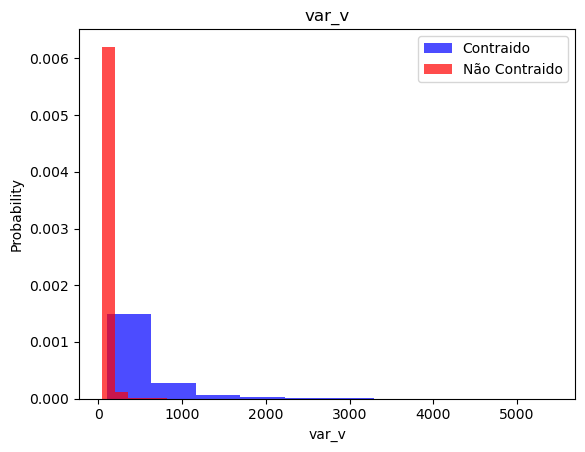

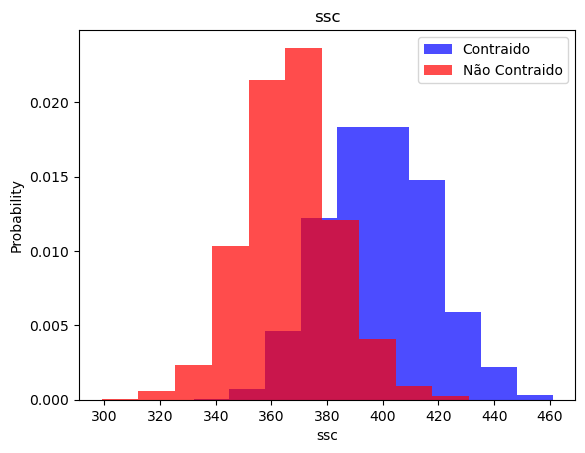

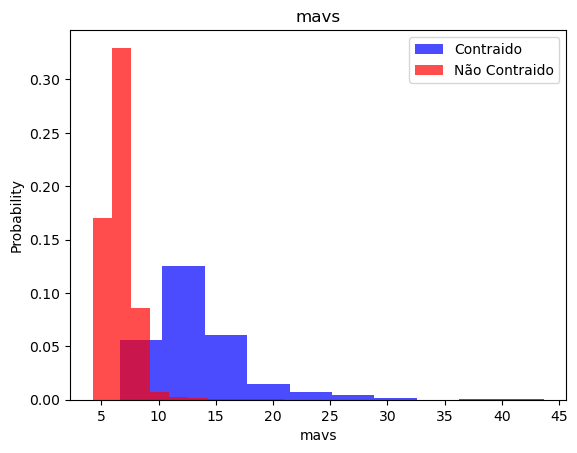

In [7]:
for label in df_features_geral.columns[:-1]:
    plt.hist(df_features_geral[df_features_geral['Contração']==1][label],color='blue',label='Contraido',alpha=0.7,density=True)
    plt.hist(df_features_geral[df_features_geral['Contração']==0][label],color='red',label='Não Contraido',alpha=0.7,density=True)
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

In [8]:
df_features_geral.corr()['Contração']

amp_en              -0.394632
rms                  0.753240
zcr                  0.452330
Band Energy Ratio   -0.110591
Spectral Centroid   -0.240727
Bandwidth           -0.036093
f0                  -0.218694
Mag_norm_f0         -0.332284
bp_50_150            0.823853
bp_150_200           0.614114
bp_200_300           0.469164
bp_300_500           0.739033
bp_novo              0.596340
bp_1_harm           -0.778305
bp_2_harm           -0.734435
bp_3_harm           -0.404019
bp_4_harm            0.411088
harm_energy         -0.863636
noise_energy         0.863871
hnr                 -0.762905
mdf                  0.729562
mnf                  0.533249
mav                  0.762411
wl                   0.756868
mean_v              -0.003398
std_v                0.753240
var_v                0.580400
ssc                  0.665756
mavs                 0.761831
Contração            1.000000
Name: Contração, dtype: float64

In [9]:

fig = px.imshow(df_features_geral.corr())
fig.show()

## Colunas

In [10]:
df_features_geral.columns

Index(['amp_en', 'rms', 'zcr', 'Band Energy Ratio', 'Spectral Centroid',
       'Bandwidth', 'f0', 'Mag_norm_f0', 'bp_50_150', 'bp_150_200',
       'bp_200_300', 'bp_300_500', 'bp_novo', 'bp_1_harm', 'bp_2_harm',
       'bp_3_harm', 'bp_4_harm', 'harm_energy', 'noise_energy', 'hnr', 'mdf',
       'mnf', 'mav', 'wl', 'mean_v', 'std_v', 'var_v', 'ssc', 'mavs',
       'Contração'],
      dtype='object')

In [11]:
time_features = ['amp_en', 'rms', 'zcr','mav', 'wl',
       'mean_v', 'std_v', 'var_v', 'ssc', 'mavs', 'Contração']

frequency_features = ['Band Energy Ratio', 'Spectral Centroid',
       'Bandwidth', 'f0', 'Mag_norm_f0', 'bp_50_150', 'bp_150_200',
       'bp_200_300', 'bp_300_500', 'bp_1_harm', 'bp_2_harm', 'bp_3_harm',
       'harm_energy', 'noise_energy', 'hnr', 'mdf', 'mnf','Contração']

In [12]:
df_features_geral = df_features_geral[:]

## Train Test Split

In [13]:
cont = len(df_features_geral[df_features_geral["Contração"] == 1])
n_cont = len(df_features_geral[df_features_geral["Contração"] == 0])

print(f"Distribuição do Dataset: \nContraído: {cont}\nNão Contraído {n_cont}")

Distribuição do Dataset: 
Contraído: 3987
Não Contraído 5306


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    df_features_geral[df_features_geral.columns[:-1]],  # todas as colunas exceto a última → features
    df_features_geral[df_features_geral.columns[-1]],   # última coluna → labels
    test_size=0.80,
    random_state=42
)



No seu trabalho de classificação de movimentos a partir de sinais EMG, você reúne diversos datasets provenientes de sessões, protocolos e condições experimentais diferentes. Ao concatenar esses arquivos, você cria um conjunto de dados amplo e heterogêneo, que representa múltiplos cenários fisiológicos e de coleta.

Quando você treina o modelo usando apenas 20% dos dados e testa nos 80% restantes, o teste funciona como uma avaliação em “dados realmente novos”, já que os cenários presentes no teste são diferentes dos usados no treino. Isso simula muito bem a aplicação do modelo em um dataset externo ou em uma nova sessão de coleta. O fato de o desempenho permanecer praticamente igual ao treinar com 80% dos dados mostra que o modelo não está decorando o conjunto de treino e está aprendendo padrões musculares robustos e generalizáveis.

Além disso, esse comportamento tende a ser uma boa indicação de que o modelo não apresentará overfitting, pois ele mantém alta performance mesmo quando exposto a uma grande variedade de cenários que não foram vistos durante o treino. Isso reforça a robustez do modelo e aumenta a confiança de que ele generalizará bem em situações reais. Como bônus, treinar com menos dados reduz custo computacional e facilita a implementação em sistemas embarcados sem perda de desempenho.








## Scale Data

$$
X_{\text{scaled}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
$$


$$
X_{\text{scaled}} = X_{\text{std}} \times (b - a) + a
$$

onde

$$
X_{\text{std}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
$$



A aplicação do numpy para a função criada para min max scaler, representa a isso em algebra linear:
$$
X_{\text{scaled}} = \frac{X - \mathbf{1}_n \min^T}{\mathbf{1}_n (\max - \min)^T}
$$


In [15]:
def min_max_scaler(X, max_values, min_values):
    # aplica o min-max manualmente com base nos valores de treino
    # verificando o resultado da certinho igual ao MinMaxScaler
    X_scaled = (X - min_values) / (max_values - min_values)
    return X_scaled

def scale_dataset(X, y, oversample=False, Train=False, max_values=None, min_values=None):
    if Train:
        # calcula os valores max e min para cada coluna (feature)
        max_values = np.max(X, axis=0)
        min_values = np.min(X, axis=0)

        # aplica MinMaxScaler do sklearn (equivalente à fórmula acima)
        scaler = MinMaxScaler()
        X_scaled = scaler.fit_transform(X)

        # opcional: oversampling
        if oversample:
            ros = RandomOverSampler()
            X_scaled, y = ros.fit_resample(X_scaled, y)

        df = np.hstack((X_scaled, np.reshape(y, (-1, 1))))

        X_scaled, y = shuffle(X_scaled, y, random_state=42)


        return df, X_scaled, y, max_values, min_values

    else:
        # normaliza o conjunto de teste usando os valores do treino
        X_scaled = min_max_scaler(X, max_values, min_values)

        if oversample:
            ros = RandomOverSampler()
            X_scaled, y = ros.fit_resample(X_scaled, y)

        df = np.hstack((X_scaled, np.reshape(y, (-1, 1))))

        X_scaled, y = shuffle(X_scaled, y, random_state=42)


        return df, X_scaled, y


In [16]:
train, X_train_array, y_train_array, max_values, min_values = scale_dataset(
    X=X_train.values, y=y_train.values, oversample=True, Train=True
)

test, X_test_array, y_test_array = scale_dataset(
    X=X_test.values, y=y_test.values, oversample=False,
    max_values=max_values, min_values=min_values
)


c:\Users\vinic\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\vinic\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:484: FutureWarning:

`BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.

c:\Users\vinic\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning:

`BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.



In [17]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Exemplo simples (você pode trocar pelo seu X_train.values)
X = X_train.values

# --- Seu algoritmo manual ---
max_values = np.max(X, axis=0)
min_values = np.min(X, axis=0)
X_manual = (X - min_values) / (max_values - min_values)

# --- Scikit-learn ---
scaler = MinMaxScaler()
X_sklearn = scaler.fit_transform(X)

# --- Comparação ---
print("Manual:")
print(X_manual)
print("\nSklearn:")
print(X_sklearn)

# Diferença absoluta média
diff = np.abs(X_manual - X_sklearn)
print("\nDiferença média:", np.mean(diff))

# Teste booleano (se são praticamente iguais)
print("São iguais (dentro da tolerância numérica)?", np.allclose(X_manual, X_sklearn))


Manual:
[[0.7201396  0.0109689  0.2        ... 0.00199582 0.29710145 0.01330721]
 [0.58644386 0.1262166  0.664      ... 0.03499682 0.67391304 0.14060422]
 [0.61945308 0.08151086 0.552      ... 0.01958697 0.49275362 0.08924471]
 ...
 [0.6235264  0.05599666 0.696      ... 0.01227422 0.5942029  0.05875709]
 [0.64368138 0.01325288 0.392      ... 0.00243643 0.44202899 0.0174739 ]
 [0.60118411 0.10426838 0.536      ... 0.02701824 0.46376812 0.10840894]]

Sklearn:
[[0.7201396  0.0109689  0.2        ... 0.00199582 0.29710145 0.01330721]
 [0.58644386 0.1262166  0.664      ... 0.03499682 0.67391304 0.14060422]
 [0.61945308 0.08151086 0.552      ... 0.01958697 0.49275362 0.08924471]
 ...
 [0.6235264  0.05599666 0.696      ... 0.01227422 0.5942029  0.05875709]
 [0.64368138 0.01325288 0.392      ... 0.00243643 0.44202899 0.0174739 ]
 [0.60118411 0.10426838 0.536      ... 0.02701824 0.46376812 0.10840894]]

Diferença média: 4.345686246672124e-17
São iguais (dentro da tolerância numérica)? True


In [18]:
len(y_train)

1858

In [19]:
len(y_test)

7435

In [20]:
sum(y_train == 0)

1071

In [21]:
sum(y_train==1)

787

# Modelos - Treino

## KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [23]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_array,y_train_array)
#use the knn model to try to predict the test dataset
y_pred_array = knn_model.predict(X_test_array)
print(classification_report(y_test_array,y_pred_array))

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      4235
         1.0       0.96      0.98      0.97      3200

    accuracy                           0.97      7435
   macro avg       0.97      0.97      0.97      7435
weighted avg       0.97      0.97      0.97      7435



## Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train_array,y_train_array)
y_pred = nb_model.predict(X_test_array)
print(classification_report(y_test_array,y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      4235
         1.0       0.96      0.98      0.97      3200

    accuracy                           0.97      7435
   macro avg       0.97      0.97      0.97      7435
weighted avg       0.97      0.97      0.97      7435



##Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
# unsing the standard function
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train_array,y_train_array)
y_pred = lg_model.predict(X_test_array)
print(classification_report(y_test_array,y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      4235
         1.0       0.96      0.98      0.97      3200

    accuracy                           0.97      7435
   macro avg       0.97      0.97      0.97      7435
weighted avg       0.97      0.97      0.97      7435



## SVM

In [28]:
from sklearn.svm import SVC

In [29]:
svm_model = SVC()
svm_model = svm_model.fit(X_train_array,y_train_array)
y_pred = svm_model.predict(X_test_array)
print(classification_report(y_test_array,y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      4235
         1.0       0.97      0.98      0.97      3200

    accuracy                           0.98      7435
   macro avg       0.98      0.98      0.98      7435
weighted avg       0.98      0.98      0.98      7435



## Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_array,y_train_array)
y_pred_dtc = dtc.predict(X_test_array)
print(f"Decision Tree Classification: \n{classification_report(y_test_array,y_pred_dtc)}")


Decision Tree Classification: 
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97      4235
         1.0       0.95      0.96      0.96      3200

    accuracy                           0.96      7435
   macro avg       0.96      0.96      0.96      7435
weighted avg       0.96      0.96      0.96      7435



## Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rfc = RandomForestClassifier()
rfc.fit(X_train_array,y_train_array)

y_pred_rfc = rfc.predict(X_test_array)
print(f'Random Forest Classification: \n{classification_report(y_test_array,y_pred_rfc)}')

Random Forest Classification: 
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      4235
         1.0       0.97      0.98      0.97      3200

    accuracy                           0.98      7435
   macro avg       0.98      0.98      0.98      7435
weighted avg       0.98      0.98      0.98      7435



# Otimizar Features

In [34]:
# https://towardsdatascience.com/best-practice-to-calculate-and-interpret-model-feature-importance-14f0e11ee660/
# https://www.geeksforgeeks.org/machine-learning/machine-learning-explainability-using-permutation-importance/
#  Inclui análise de interpretabilidade – Mostrar pesos e importâncias das features (via Random Forest, SHAP ou Permutation Importance)
# é um diferencial, pois não só apresenta resultados, mas explica o “porquê” do desempenho.

In [35]:
#from sklearn.inspection import permutation_importance
##calculate permutation importance for test data
#result_test = permutation_importance(
#    knn_model, X_test_array, y_test_array, n_repeats=20, random_state=42, n_jobs=2
#)
#
#sorted_importances_idx_test = result_test.importances_mean.argsort()
#importances_test = pd.DataFrame(
#    result_test.importances[sorted_importances_idx_test].T,
#    columns=X_train.columns[sorted_importances_idx_test],
#)
#
##calculate permutation importance for training data
#result_train = permutation_importance(
#    knn_model, X_train_array, y_train_array, n_repeats=20, random_state=42, n_jobs=2
#)
#
#sorted_importances_idx_train = result_train.importances_mean.argsort()
#importances_train = pd.DataFrame(
#    result_train.importances[sorted_importances_idx_train].T,
#    columns=X_train.columns[sorted_importances_idx_train],
#)
#
#f, axs = plt.subplots(1,2,figsize=(15,5))
#
#importances_test.plot.box(vert=False, whis=10, ax = axs[0])
#axs[0].set_title("Permutation Importances (test set)")
#axs[0].axvline(x=0, color="k", linestyle="--")
#axs[0].set_xlabel("Decrease in accuracy score")
#axs[0].figure.tight_layout()
#
#importances_train.plot.box(vert=False, whis=10, ax = axs[1])
#axs[1].set_title("Permutation Importances (train set)")
#axs[1].axvline(x=0, color="k", linestyle="--")
#axs[1].set_xlabel("Decrease in accuracy score")
#axs[1].figure.tight_layout()

In [36]:
pip install eli5

  Using cached scikit_learn-1.6.1-cp39-cp39-win_amd64.whl.metadata (15 kB)
Using cached scikit_learn-1.6.1-cp39-cp39-win_amd64.whl (11.2 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.1
    Uninstalling scikit-learn-1.5.1:
      Successfully uninstalled scikit-learn-1.5.1
  Rolling back uninstall of scikit-learn
  Moving to c:\users\vinic\anaconda3\envs\myenv\lib\site-packages\scikit_learn-1.5.1.dist-info\
   from C:\Users\vinic\anaconda3\envs\myenv\Lib\site-packages\~cikit_learn-1.5.1.dist-info
  Moving to c:\users\vinic\anaconda3\envs\myenv\lib\site-packages\sklearn\.libs\
   from C:\Users\vinic\anaconda3\envs\myenv\Lib\site-packages\sklearn\~libs
  Moving to c:\users\vinic\anaconda3\envs\myenv\lib\site-packages\sklearn\__check_build\__init__.py
   from C:\Users\vinic\AppData\Local\Temp\pip-uninstall-ovmage1m\__init__.py
  Moving to c:\users\vinic\anaconda3\envs\myenv\lib\site-packages\sklearn\__check_build\__pycache__\
   from C:\Users\vin

ERROR: Could not install packages due to an OSError: [WinError 5] Acesso negado: 'c:\\Users\\vinic\\anaconda3\\envs\\myenv\\Lib\\site-packages\\sklearn\\tree\\_partitioner.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [37]:
X_train.columns

Index(['amp_en', 'rms', 'zcr', 'Band Energy Ratio', 'Spectral Centroid',
       'Bandwidth', 'f0', 'Mag_norm_f0', 'bp_50_150', 'bp_150_200',
       'bp_200_300', 'bp_300_500', 'bp_novo', 'bp_1_harm', 'bp_2_harm',
       'bp_3_harm', 'bp_4_harm', 'harm_energy', 'noise_energy', 'hnr', 'mdf',
       'mnf', 'mav', 'wl', 'mean_v', 'std_v', 'var_v', 'ssc', 'mavs'],
      dtype='object')

In [38]:

import eli5
from eli5.sklearn import PermutationImportance

# Permutation Importance
perm = PermutationImportance(rfc, random_state=42).fit(X_test_array, y_test_array)

# Texto completo com todas as features (sem truncar)
texto = eli5.format_as_text(
    eli5.explain_weights(perm, feature_names=list(X_train.columns), top=None)
)
print(texto)


Explained as: feature importances

Feature importances, computed as a decrease in score when feature
values are permuted (i.e. become noise). This is also known as 
permutation importance.

If feature importances are computed on the same data as used for training, 
they don't reflect importance of features for generalization. Use a held-out
dataset if you want generalization feature importances.

0.0013 ± 0.0027  wl
0.0006 ± 0.0004  Mag_norm_f0
0.0006 ± 0.0004  ssc
0.0006 ± 0.0002  Spectral Centroid
0.0005 ± 0.0007  mnf
0.0003 ± 0.0002  bp_novo
0.0003 ± 0.0002  Bandwidth
0.0002 ± 0.0001  Band Energy Ratio
0.0002 ± 0.0003  bp_4_harm
0.0002 ± 0.0003  bp_200_300
0.0001 ± 0.0004  f0
0.0000 ± 0.0005  bp_3_harm
-0.0000 ± 0.0008  harm_energy
-0.0000 ± 0.0005  zcr
-0.0000 ± 0.0002  mav
-0.0001 ± 0.0003  bp_150_200
-0.0001 ± 0.0010  bp_1_harm
-0.0001 ± 0.0003  std_v
-0.0002 ± 0.0003  bp_300_500
-0.0002 ± 0.0003  mdf
-0.0002 ± 0.0009  rms
-0.0002 ± 0.0004  bp_50_150
-0.0003 ± 0.0001  mean_v
-0.0

# Modelo - Testar -> Outros Datasets

In [39]:

X_train = df_features_geral[df_features_geral.columns[:-1]].values  # todas as colunas exceto a última → features
y_train = df_features_geral[df_features_geral.columns[-1]].values   # última coluna → labels

train, X_train_array, y_train_array, max_values, min_values = scale_dataset(
    X=X_train, y=y_train, oversample=True, Train=True
)



c:\Users\vinic\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\vinic\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:484: FutureWarning:

`BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.

c:\Users\vinic\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: FutureWarning:

`BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.



In [40]:
## Usando o Random Forest

rfc = RandomForestClassifier()
rfc.fit(X_train_array,y_train_array)


RandomForestClassifier()

In [41]:



df_features_geral_dedos = pd.read_csv(path+"emg__modulo_mov_dedos_esq_dir_5s_1.csvFeatures.csv")
colunas = list(df_features_geral_dedos.columns[:-2]) + ['Clusters_Kmeans']
df_features_geral_dedos = df_features_geral_dedos[colunas]
print(f"{arquivo} -> {cluster}")
df_features_geral_dedos.rename(columns={"Clusters_Kmeans":"Contração"}, inplace=True)




FileNotFoundError: [Errno 2] No such file or directory: 'C://Users//vinic//Documents//Arduino//ler_monitor_serial_python_emg//teste_extensor//Features Datasets//emg__modulo_mov_dedos_esq_dir_5s_1.csvFeatures.csv'

In [ ]:
X_test_dedos = df_features_geral_dedos[df_features_geral_dedos.columns[:-1]].values  # todas as colunas exceto a última → features
y_test_dedos = df_features_geral_dedos[df_features_geral_dedos.columns[-1]].values   # última coluna → labels


test, X_test_dedos_array, y_test_dedos_array = scale_dataset(
    X=X_test_dedos, y=y_test_dedos, oversample=False, Train=False, max_values=max_values, min_values=min_values
)


In [ ]:
y_pred_dedos_rfc = rfc.predict(X_test_dedos_array)
print(f'Random Forest Classification: \n{classification_report(y_test_dedos_array,y_pred_dedos_rfc)}')

In [ ]:
#df_emg_mao_aberta_1 = pd.read_csv(path+"emg__modulo_1_aberta.csv_Features.csv")
#df_emg_mao_aberta_2 = pd.read_csv(path+"emg__modulo_1_aberta_2.csv_Features.csv")
#df_emg_mao_aberta_3 = pd.read_csv(path+"emg__modulo_1_aberta_3.csv_Features.csv")
#
#df_emg_mao_fecha_forte = pd.read_csv(path+"emg__modulo_1_fechada_forte.csv_Features.csv")
#df_emg_mao_fecha_3 = pd.read_csv(path+"emg__modulo_1_fechada_3.csv_Features.csv")
#df_emg_mao_fecha_2 = pd.read_csv(path+"emg__modulo_1_fechada_2.csv_Features.csv")
#df_emg_mao_fecha_1 = pd.read_csv(path+"emg__modulo_1_fechada.csv_Features.csv")
#
#
#
#
#
## Concatene todos os DataFrames
#df_concat_test = pd.concat([
#    df_emg_mao_aberta_1,
#    df_emg_mao_aberta_2,
#    df_emg_mao_aberta_3,
#    df_emg_mao_fecha_forte,
#    df_emg_mao_fecha_3,
#    df_emg_mao_fecha_2,
#    df_emg_mao_fecha_1
#], ignore_index=True)
#
#
#X_test = df_concat_test[df_concat_test.columns[:-1]].values  # todas as colunas exceto a última → features
#y_test = df_concat_test[df_concat_test.columns[-1]].values   # última coluna → labels
#print(X_test.shape)
#print(y_test.shape)
#
#test, X_test_array, y_test_array= scale_dataset(
#    X=X_test, y=y_test, oversample=True, Train=False,max_values=max_values, min_values=min_values
#)
#
#
#
#

In [ ]:
#y_pred_rfc = rfc.predict(X_test_array)
#print(f'Random Forest Classification: Teste Pegando só Dados Novos\n{classification_report(y_test_array,y_pred_rfc)}')

In [ ]:
#df_emg_mao_abre_fecha = pd.read_csv(path+"emg__modulo_1_abre_fecha_Features.csv")
#
#X_test = df_emg_mao_abre_fecha[df_emg_mao_abre_fecha.columns[:-1]].values  # todas as colunas exceto a última → features
#y_test = df_emg_mao_abre_fecha[df_emg_mao_abre_fecha.columns[-1]].values   # última coluna → labels
#y_test[:10] = y_test[:10] +10 # so para ter valores diferentes, esse label foi aleatorio, tudo zero, porque nao tem
## é para testar com dados 100% novos, nesse caso o cluster com ele ficou ruim
#print(X_test.shape)
#print(y_test.shape)
#
#test, X_test_array, y_test_array= scale_dataset(
#    X=X_test, y=y_test, oversample=True, Train=False,max_values=max_values, min_values=min_values
#)
#
#y_pred_rfc = rfc.predict(X_test_array)
#
#
#signal = pd.read_csv(path+"emg__modulo_1_abre_fecha_FILTERED.csv")
#ADC_Value = signal.ADC_VALUE.values
#t = signal.TIME_s.values
#periodo = float(signal.loc[1,"TIME_s"] - signal.loc[0,"TIME_s"])
#sr = 1/periodo

In [ ]:



#
#FRAME_SIZE = 512*2
#HOP_LENGTH = int(0.25*FRAME_SIZE)
## Número de frames e tamanho de cada frame
#
#n_frames = len(y_pred_rfc)
#frame_times = np.arange(n_frames) * HOP_LENGTH / sr  # tempo inicial de cada frame
#
## Para plotar clusters no tempo, repetimos o valor do cluster para cada ponto do frame
#cluster_signal = np.repeat(y_pred_rfc, HOP_LENGTH)
#cluster_time = np.arange(len(cluster_signal)) / sr  # tempo correspondente
#
#    # Ajusta o tamanho para coincidir com o sinal real (em caso de padding final)
#    #cluster_signal = cluster_signal[:len(signal)]
#    #cluster_time = cluster_time[:len(signal)]
#fig = go.Figure()
#
#    # Plot do sinal EMG
#fig.add_trace(go.Scatter(
#        x=t,
#        y=ADC_Value,
#        mode='lines',
#        name='EMG',
#        line=dict(color='blue', width=1)
#    ))
#
#    # Plot do cluster (como linha escalonada)
#fig.add_trace(go.Scatter(
#        x=t,
#        y=cluster_signal * np.max(ADC_Value),  # escala para coincidir visualmente com o sinal
#        mode='lines',
#        name='Cluster',
#        line=dict(color='red', width=2, dash='dot')
#    ))
#
#fig.update_layout(
#        title=f"Abre e Fecha 1 — Sinal EMG e Cluster por Frame",
#        xaxis_title="Tempo [s]",
#        yaxis_title="Amplitude",
#        height=500
#    )
#
#fig.show()
#